# Lesson 1 Practice - Cars

In this notebook I'll use lesson 1 knowledge to build an image classifier. The ultimate goal will be to identify the car model in the image from several car manufacturers - I'll start using the Stanford Dataset which can be found [here](https://ai.stanford.edu/~jkrause/cars/car_dataset.html).

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

Import fast.ai library:

In [3]:
from fastai.vision import *
from fastai.metrics import error_rate

## Creating the DataBunch

Dataset path:

In [4]:
path = "/notebooks/storage/car_data"

Create the DataBunch using the factory *.from_folder*. Set the valid_pct to 0.2 - 20% of the set will be the validation set. Specicy the size as (224,224) - this resizes but doesn't crop the images.

Set the random seed to 42 (it can be any number, just choose and always use the same) to guarantee that the same validation set is every time.

In [5]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=(224,224), num_workers=4).normalize(imagenet_stats)

In [6]:
data.classes

['AM General Hummer SUV 2000',
 'Acura Integra Type R 2001',
 'Acura RL Sedan 2012',
 'Acura TL Sedan 2012',
 'Acura TL Type-S 2008',
 'Acura TSX Sedan 2012',
 'Acura ZDX Hatchback 2012',
 'Aston Martin V8 Vantage Convertible 2012',
 'Aston Martin V8 Vantage Coupe 2012',
 'Aston Martin Virage Convertible 2012',
 'Aston Martin Virage Coupe 2012',
 'Audi 100 Sedan 1994',
 'Audi 100 Wagon 1994',
 'Audi A5 Coupe 2012',
 'Audi R8 Coupe 2012',
 'Audi RS 4 Convertible 2008',
 'Audi S4 Sedan 2007',
 'Audi S4 Sedan 2012',
 'Audi S5 Convertible 2012',
 'Audi S5 Coupe 2012',
 'Audi S6 Sedan 2011',
 'Audi TT Hatchback 2011',
 'Audi TT RS Coupe 2012',
 'Audi TTS Coupe 2012',
 'Audi V8 Sedan 1994',
 'BMW 1 Series Convertible 2012',
 'BMW 1 Series Coupe 2012',
 'BMW 3 Series Sedan 2012',
 'BMW 3 Series Wagon 2012',
 'BMW 6 Series Convertible 2007',
 'BMW ActiveHybrid 5 Sedan 2012',
 'BMW M3 Coupe 2012',
 'BMW M5 Sedan 2010',
 'BMW M6 Convertible 2010',
 'BMW X3 SUV 2012',
 'BMW X5 SUV 2007',
 'BMW X6

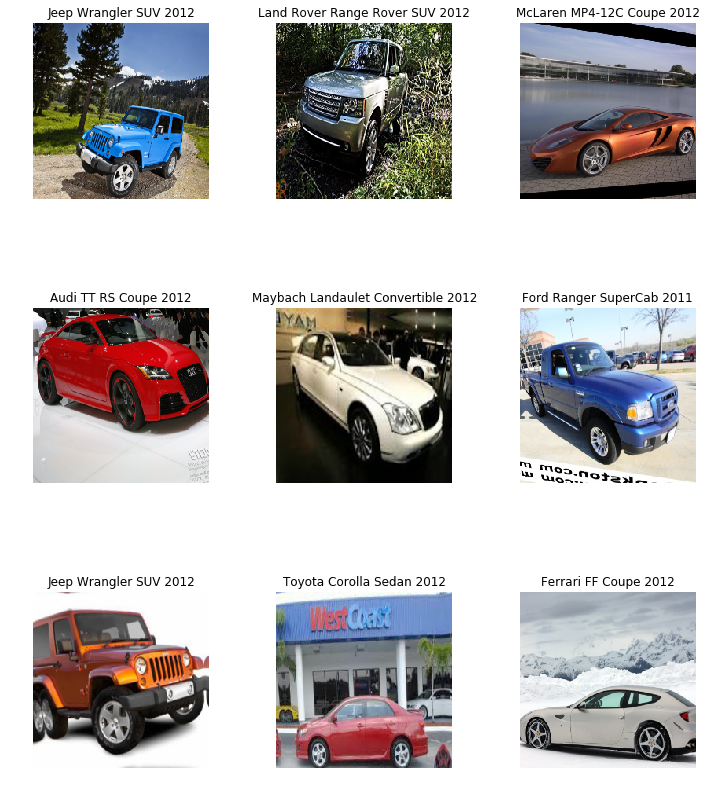

In [7]:
data.show_batch(rows=3, figsize=(10,12))

## Train the Model

We will use a **Resnet34** CNN and we'll train for 4 epochs (4 cycles through all our data).

In [8]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [9]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,4.751536,3.192449,0.744208,03:10
1,2.978646,2.109822,0.545876,02:25
2,2.188578,1.677087,0.445165,02:31
3,1.744323,1.583160,0.421687,02:38


In [10]:
learn.save('stage-1')

## Unfreezing, Fine-tuning, and Learning Rates

We will unfreeze the model, plot the Learning Rate vs. the Loss and choose a set of learning rate values where the Loss is not diverging. This bracket of learning rates will be used to train our model through two more epochs.

In [11]:
learn.unfreeze()

In [12]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


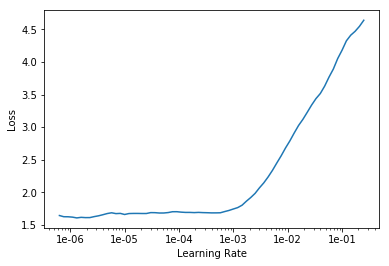

In [13]:
# If the plot is not showing or you want to specify the plot x-axis limits use:
# learn.lr_find(start_lr=1e-5, end_lr=1e-1)
learn.recorder.plot()

In [14]:
learn.fit_one_cycle(2, max_lr=slice(1e-6,5e-3))

epoch,train_loss,valid_loss,error_rate,time
0,2.084342,1.396069,0.391412,02:41
1,1.214435,0.930309,0.264442,02:45


In [15]:
learn.fit_one_cycle(2, max_lr=slice(1e-6,5e-3))

epoch,train_loss,valid_loss,error_rate,time
0,1.352744,1.105021,0.312635,02:39
1,0.811869,0.708612,0.209144,02:33


In [16]:
learn.save('stage-2')

## Results

Let's see what results we have got.

We will first see which were the categories that the model most confused with one another. We will try to see if what the model predicted was reasonable or not. In this case the mistakes look reasonable (none of the mistakes seems obviously naive). This is an indicator that our classifier is working correctly.

Furthermore, when we plot the confusion matrix, we can see that the distribution is heavily skewed: the model makes the same mistakes over and over again but it rarely confuses other categories. This suggests that it just finds it difficult to distinguish some specific categories between each other; this is normal behaviour.

In [17]:
interp = ClassificationInterpretation.from_learner(learn)

Show the top nine losses. The values presented above each image are the Prediction/Actual/Loss/Probability. 

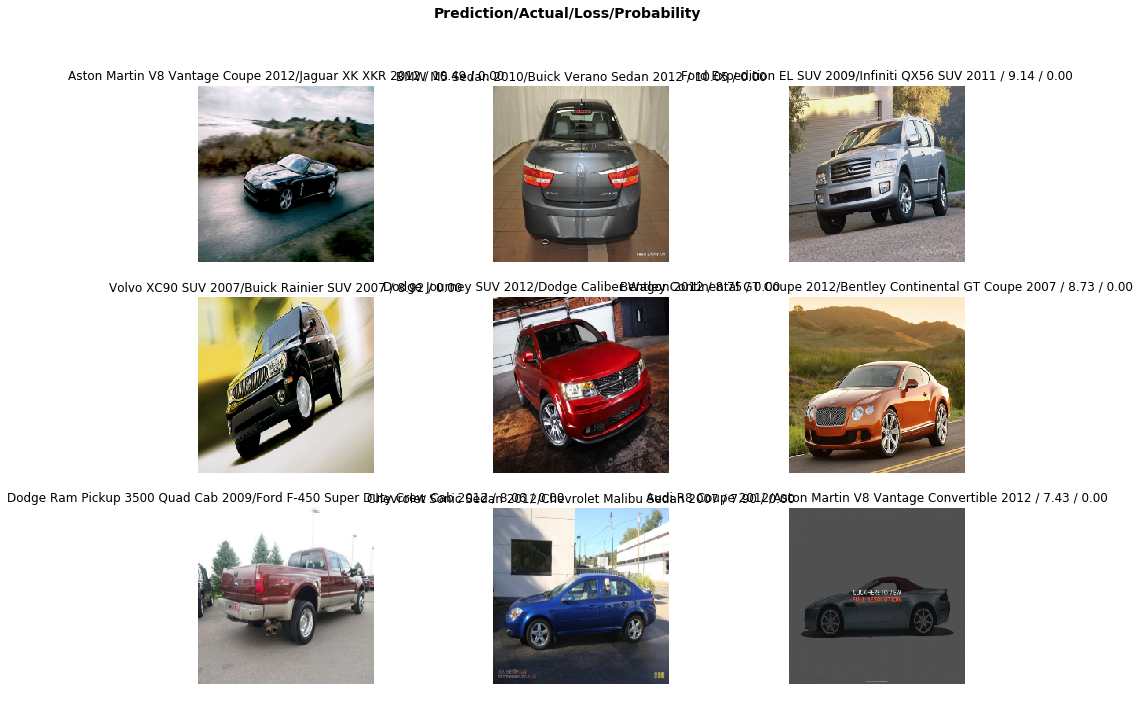

In [18]:
interp.plot_top_losses(9, figsize=(15,11))

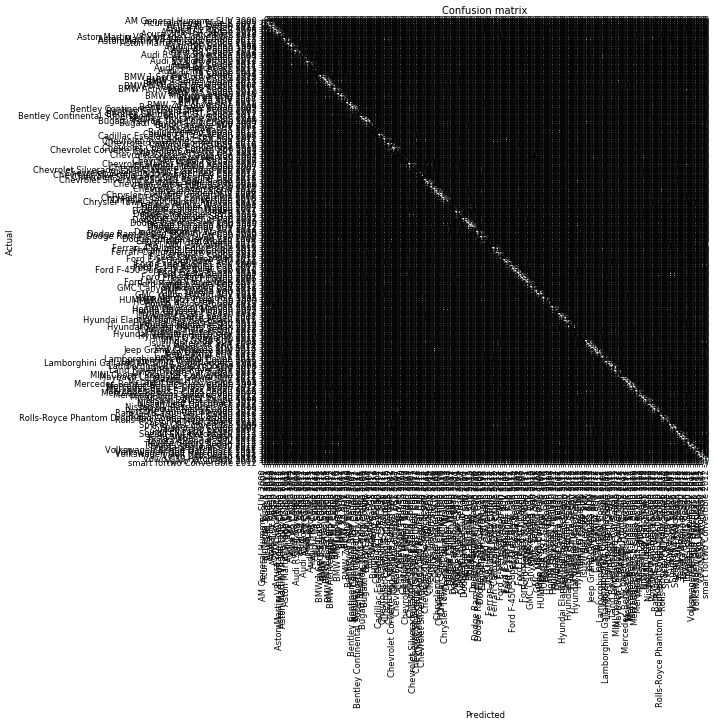

In [19]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [20]:
interp.most_confused(min_val=2)

[('Audi 100 Sedan 1994', 'Audi V8 Sedan 1994', 12),
 ('Chevrolet Silverado 1500 Hybrid Crew Cab 2012',
  'Chevrolet Silverado 1500 Extended Cab 2012',
  7),
 ('Audi TTS Coupe 2012', 'Audi TT Hatchback 2011', 6),
 ('Bentley Continental GT Coupe 2007', 'Bentley Continental GT Coupe 2012', 6),
 ('Ferrari 458 Italia Convertible 2012', 'Ferrari 458 Italia Coupe 2012', 6),
 ('Audi S5 Coupe 2012', 'Audi A5 Coupe 2012', 5),
 ('Ferrari California Convertible 2012',
  'Ferrari 458 Italia Convertible 2012',
  5),
 ('GMC Savana Van 2012', 'Chevrolet Express Cargo Van 2007', 5),
 ('Audi 100 Wagon 1994', 'Audi V8 Sedan 1994', 4),
 ('Audi TT Hatchback 2011', 'Audi TT RS Coupe 2012', 4),
 ('Audi TT Hatchback 2011', 'Audi TTS Coupe 2012', 4),
 ('Chevrolet Express Van 2007', 'GMC Savana Van 2012', 4),
 ('Chevrolet Silverado 1500 Extended Cab 2012',
  'Chevrolet Silverado 1500 Regular Cab 2012',
  4),
 ('Dodge Sprinter Cargo Van 2009', 'Mercedes-Benz Sprinter Van 2012', 4),
 ('Spyker C8 Coupe 2009', 'Spy